In [1]:
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

In [2]:
import fxcm
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
con = fxcm.fxcm(config_file='FXCM.conf', log_level='error')

In [5]:
con.is_connected()

True

In [6]:
instr = con.get_instruments()
print(instr)

['EUR/USD', 'USD/JPY', 'GBP/USD', 'USD/CHF', 'EUR/CHF', 'AUD/USD', 'USD/CAD', 'NZD/USD', 'EUR/GBP', 'EUR/JPY', 'GBP/JPY', 'CHF/JPY', 'GBP/CHF', 'EUR/AUD', 'EUR/CAD', 'AUD/CAD', 'AUD/JPY', 'CAD/JPY', 'NZD/JPY', 'GBP/CAD', 'GBP/NZD', 'GBP/AUD', 'AUD/NZD', 'USD/SEK', 'EUR/SEK', 'EUR/NOK', 'USD/NOK', 'USD/MXN', 'AUD/CHF', 'EUR/NZD', 'USD/ZAR', 'USD/HKD', 'ZAR/JPY', 'USD/TRY', 'EUR/TRY', 'NZD/CHF', 'CAD/CHF', 'NZD/CAD', 'TRY/JPY', 'USD/CNH', 'AUS200', 'ESP35', 'FRA40', 'GER30', 'HKG33', 'JPN225', 'NAS100', 'SPX500', 'UK100', 'US30', 'Copper', 'EUSTX50', 'USDOLLAR', 'USOil', 'UKOil', 'NGAS', 'Bund', 'XAU/USD', 'XAG/USD']


In [7]:
instr = con.get_instruments_for_candles()
print(instr)

['EUR/USD', 'USD/JPY', 'GBP/USD', 'USD/CHF', 'EUR/CHF', 'AUD/USD', 'USD/CAD', 'NZD/USD', 'EUR/GBP', 'EUR/JPY', 'GBP/JPY', 'AUD/JPY', 'GBP/AUD', 'USD/CNH', 'FRA40', 'GER30', 'UK100', 'US30', 'USDOLLAR', 'XAU/USD', 'XAG/USD']


In [10]:
start = dt.datetime(2017, 7, 15)
stop = dt.datetime(2017, 8, 1)
con.get_candles('EUR/USD', period='D1',
                start=start, stop=stop)

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
date,,,,,,,,,
2017-07-16 21:00:00,1.14642,1.14721,1.14723,1.14597,1.14702,1.14761,1.14782,1.14686,183
2017-07-17 21:00:00,1.14721,1.14768,1.14859,1.14336,1.14761,1.14803,1.14885,1.14360,210489
2017-07-18 21:00:00,1.14768,1.15514,1.15821,1.14703,1.14803,1.15549,1.15846,1.14728,347712
2017-07-19 21:00:00,1.15514,1.15134,1.15552,1.15089,1.15549,1.15171,1.15603,1.15111,227875
2017-07-20 21:00:00,1.15134,1.16286,1.16575,1.14781,1.15171,1.16325,1.16602,1.14804,422458
2017-07-21 21:00:00,1.16286,1.16622,1.16817,1.16181,1.16325,1.16658,1.16843,1.16205,282128
2017-07-23 21:00:00,1.16622,1.16588,1.16663,1.16539,1.16658,1.16692,1.16738,1.16641,184
2017-07-24 21:00:00,1.16588,1.16378,1.16831,1.16245,1.16692,1.16424,1.16855,1.16271,249547
2017-07-25 21:00:00,1.16378,1.16442,1.17111,1.16293,1.16424,1.16485,1.17136,1.16320,293787


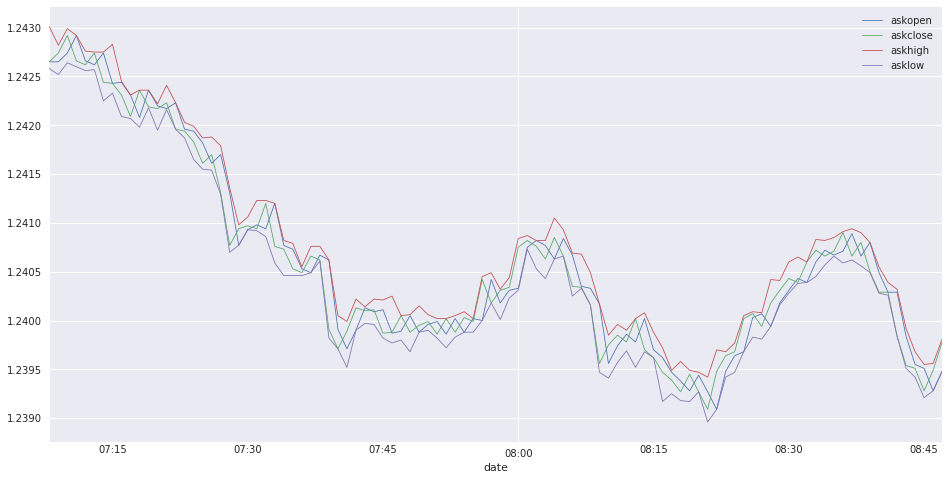

In [11]:
con.get_candles('EUR/USD', period='m1',
                       columns=['asks'], number=100).plot(figsize=(16, 8), lw=0.8)

In [4]:
order = con.create_entry_order(symbol='USD/JPY', is_buy=True,
                               amount=300, limit=112,
                               is_in_pips = False,
                               time_in_force='GTC', rate=110,
                               stop=None, trailing_step=None)

In [13]:
order = con.create_entry_order(symbol='GBP/USD', is_buy=True,
                                   amount=300, rate= 1.36,
                                   limit=1.37, is_in_pips = False,
                                   time_in_force='GTC')

In [5]:
order_id = order.get_orderId()

In [6]:
print(con.get_order(order_id))

accountId:        2815291
accountName:      02815291
amountK:          300
buy:              110
currency:         USD/JPY
currencyPoint:    27.63105
isBuy:            True
isELSOrder:       False
isEntryOrder:     True
isLimitOrder:     False
isNetQuantity:    False
isStopOrder:      True
limit:            112
limitPegBaseType: -1
limitRate:        112
ocoBulkId:        0
orderId:          97644620
range:            0
sell:             0
status:           Waiting
stop:             0
stopMove:         0
stopPegBaseType:  -1
stopRate:         0
time:             2018-01-26 16:22:36.563000
timeInForce:      GTC
type:             SE



In [16]:
con.get_orders().T

,0,1,2,3
accountId,2815291,2815291,2815291,2815291
accountName,02815291,02815291,02815291,02815291
amountK,300,300,300,300
buy,110,1.36,110,1.36
currency,USD/JPY,GBP/USD,USD/JPY,GBP/USD
currencyPoint,27.5199,30,27.5199,30
expireDate,,,,
isBuy,True,True,True,True
isELSOrder,False,False,False,False
isEntryOrder,True,True,True,True


In [45]:
def print_new_price(data, dataframe):
    print('%2d | new values received for %s | %s, %s, %s, %s, %s'
          % (len(dataframe), data['Symbol'],
             pd.to_datetime(int(data['Updated']), unit='ms'),
             data['Rates'][0], data['Rates'][1], data['Rates'][2],
             data['Rates'][3]))

In [46]:
con.subscribe_market_data('EUR/USD', (print_new_price,))

 1 | new values received for EUR/USD | 2018-01-26 09:55:36.507000, 1.24527, 1.24549, 1.2495, 1.23687
 2 | new values received for EUR/USD | 2018-01-26 09:55:37.106000, 1.24527, 1.24549, 1.2495, 1.23687
 3 | new values received for EUR/USD | 2018-01-26 09:55:38.133000, 1.24523, 1.24547, 1.2495, 1.23687
 4 | new values received for EUR/USD | 2018-01-26 09:55:38.549000, 1.24522, 1.24546, 1.2495, 1.23687
 5 | new values received for EUR/USD | 2018-01-26 09:55:38.952000, 1.24521, 1.24544, 1.2495, 1.23687
 6 | new values received for EUR/USD | 2018-01-26 09:55:39.336000, 1.24521, 1.24545, 1.2495, 1.23687
 7 | new values received for EUR/USD | 2018-01-26 09:55:40.144000, 1.24519, 1.24542, 1.2495, 1.23687
 8 | new values received for EUR/USD | 2018-01-26 09:55:40.302000, 1.24521, 1.24542, 1.2495, 1.23687
 9 | new values received for EUR/USD | 2018-01-26 09:55:41.114000, 1.24521, 1.24546, 1.2495, 1.23687


In [47]:
con.unsubscribe_market_data('EUR/USD')

10 | new values received for EUR/USD | 2018-01-26 09:55:43.640000, 1.24524, 1.24547, 1.2495, 1.23687
